<h1>Problem 2. Train a machine learning model using the training file to predict the values of the ‘tat_in_days’ column for the test file. 
</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

<h2> Reading the train.csv.csv file </h2>

In [3]:
train_data=pd.read_csv('problem_2_train.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


<h1> The problem is Regression problem because the data of dependent variable i.e 'tat' is continuous </h1>

<h2> First of all ,checking for outliers </h2>

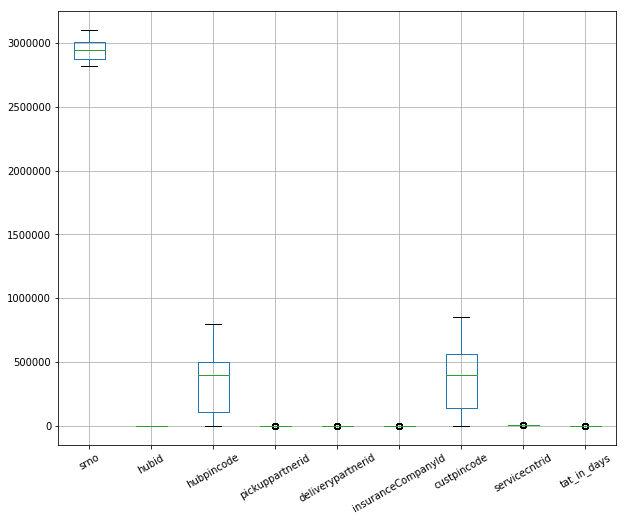

In [4]:
plt.figure(figsize=(10,8))
train_data.boxplot()
plt.xticks(rotation=30)
plt.show()

<h2> No outliers in the data </h2>

<h3> Cleaning the data.....Handling categorical data (Replacing existing categorical columns)</h3>

In [5]:
mob_arr=train_data.mobmake.unique()

In [6]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

38

In [7]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [8]:
train_data['mobmake']=train_data.mobmake.map(mob_dict)


In [9]:
train_data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [10]:
train_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [11]:
train_data['custpincodecategory']=train_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [12]:
train_data['claimtype']=train_data.claimtype.map({'ADLD':1,'EW':2})

In [13]:
type(train_data['mobilepurchasedate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

In [15]:
#train_data.drop(['srno','hubid','custpincodecategory'],axis=1,inplace=True)

In [16]:
train_data['mobilepurchase_date']=train_data.mobilepurchasedate.dt.day
#train_data['mobilepurchase_month']=train_data.mobilepurchasedate.dt.month

#train_data['mobilepurchasedate']

In [17]:
train_data['claimint_date']=train_data.claimintdate.dt.day
#train_data['claimint_month']=train_data.claimintdate.dt.month


In [18]:
train_data['pickupStart_date']=train_data.pickupStartdate.dt.day
#train_data['pickupStart_month']=train_data.pickupStartdate.dt.month


train_data['memcreated_date']=train_data.memcreateddate.dt.day
#train_data['memcreated_month']=train_data.memcreateddate.dt.month



<h2> Calculating the difference of pickupstartdate and claimdate </h2>

In [19]:
train_data['diff_pickup_claim']=abs((train_data['pickupStartdate']-train_data['claimintdate']) / np.timedelta64(1, 'D'))
train_data.head(10)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,mobilepurchase_date,claimint_date,pickupStart_date,memcreated_date,diff_pickup_claim
0,2851218,0,7,500004,233,233,131,1,1,500001,...,2016-12-02,2018-02-08,4403,2018-02-13,5,2,8,13,27,5.0
1,2838330,1,10,226010,233,233,131,1,1,226022,...,2017-03-05,2018-02-04,4444,2018-02-08,12,5,4,8,6,4.0
2,2835781,1,2,110018,233,233,228,1,1,110018,...,2018-01-27,2018-02-03,4388,2018-02-12,9,27,3,12,1,9.0
3,2838589,2,2,110018,233,233,228,2,1,124001,...,2018-01-31,2018-02-04,4092,2018-02-14,9,31,4,14,17,10.0
4,2855214,0,21,110015,233,233,131,1,1,201301,...,2018-01-20,2018-02-09,4580,2018-02-14,8,20,9,14,23,5.0
5,2852784,0,21,110015,233,233,131,2,1,132001,...,2017-12-17,2018-02-08,4580,2018-02-15,9,17,8,15,22,7.0
6,2844713,3,2,110018,233,233,131,1,1,110059,...,2017-08-22,2018-02-06,4094,2018-02-09,15,22,6,9,26,3.0
7,2829719,3,6,160059,233,233,131,2,1,151001,...,2017-03-13,2018-02-01,4549,2018-02-10,16,13,1,10,14,9.0
8,2833619,0,3,560011,201,233,131,1,1,560076,...,2017-07-22,2018-02-03,4467,2018-02-08,17,22,3,8,23,5.0
9,2870579,1,5,380009,233,233,131,2,1,390006,...,2017-05-31,2018-02-14,4422,2018-02-20,11,31,14,20,1,6.0


In [20]:
#train_data.groupby('tat_in_days').describe
#train_data.query('claimtype==1')
#train_data.drop(['pickuppartnerid','deliverypartnerid','claimtype','srno'],axis=1,inplace=True)
# train_data.drop('deliverypartnerid',axis=1)
# train_data.drop('claimtype',axis=1)
# train_data.drop('srno',axis=1)


In [21]:
# dataset=train_data.sort_values('mobmake')

# dataset.shape
train_data.head(15)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,mobilepurchase_date,claimint_date,pickupStart_date,memcreated_date,diff_pickup_claim
0,2851218,0,7,500004,233,233,131,1,1,500001,...,2016-12-02,2018-02-08,4403,2018-02-13,5,2,8,13,27,5.0
1,2838330,1,10,226010,233,233,131,1,1,226022,...,2017-03-05,2018-02-04,4444,2018-02-08,12,5,4,8,6,4.0
2,2835781,1,2,110018,233,233,228,1,1,110018,...,2018-01-27,2018-02-03,4388,2018-02-12,9,27,3,12,1,9.0
3,2838589,2,2,110018,233,233,228,2,1,124001,...,2018-01-31,2018-02-04,4092,2018-02-14,9,31,4,14,17,10.0
4,2855214,0,21,110015,233,233,131,1,1,201301,...,2018-01-20,2018-02-09,4580,2018-02-14,8,20,9,14,23,5.0
5,2852784,0,21,110015,233,233,131,2,1,132001,...,2017-12-17,2018-02-08,4580,2018-02-15,9,17,8,15,22,7.0
6,2844713,3,2,110018,233,233,131,1,1,110059,...,2017-08-22,2018-02-06,4094,2018-02-09,15,22,6,9,26,3.0
7,2829719,3,6,160059,233,233,131,2,1,151001,...,2017-03-13,2018-02-01,4549,2018-02-10,16,13,1,10,14,9.0
8,2833619,0,3,560011,201,233,131,1,1,560076,...,2017-07-22,2018-02-03,4467,2018-02-08,17,22,3,8,23,5.0
9,2870579,1,5,380009,233,233,131,2,1,390006,...,2017-05-31,2018-02-14,4422,2018-02-20,11,31,14,20,1,6.0


<h3> Heatmap </h3>

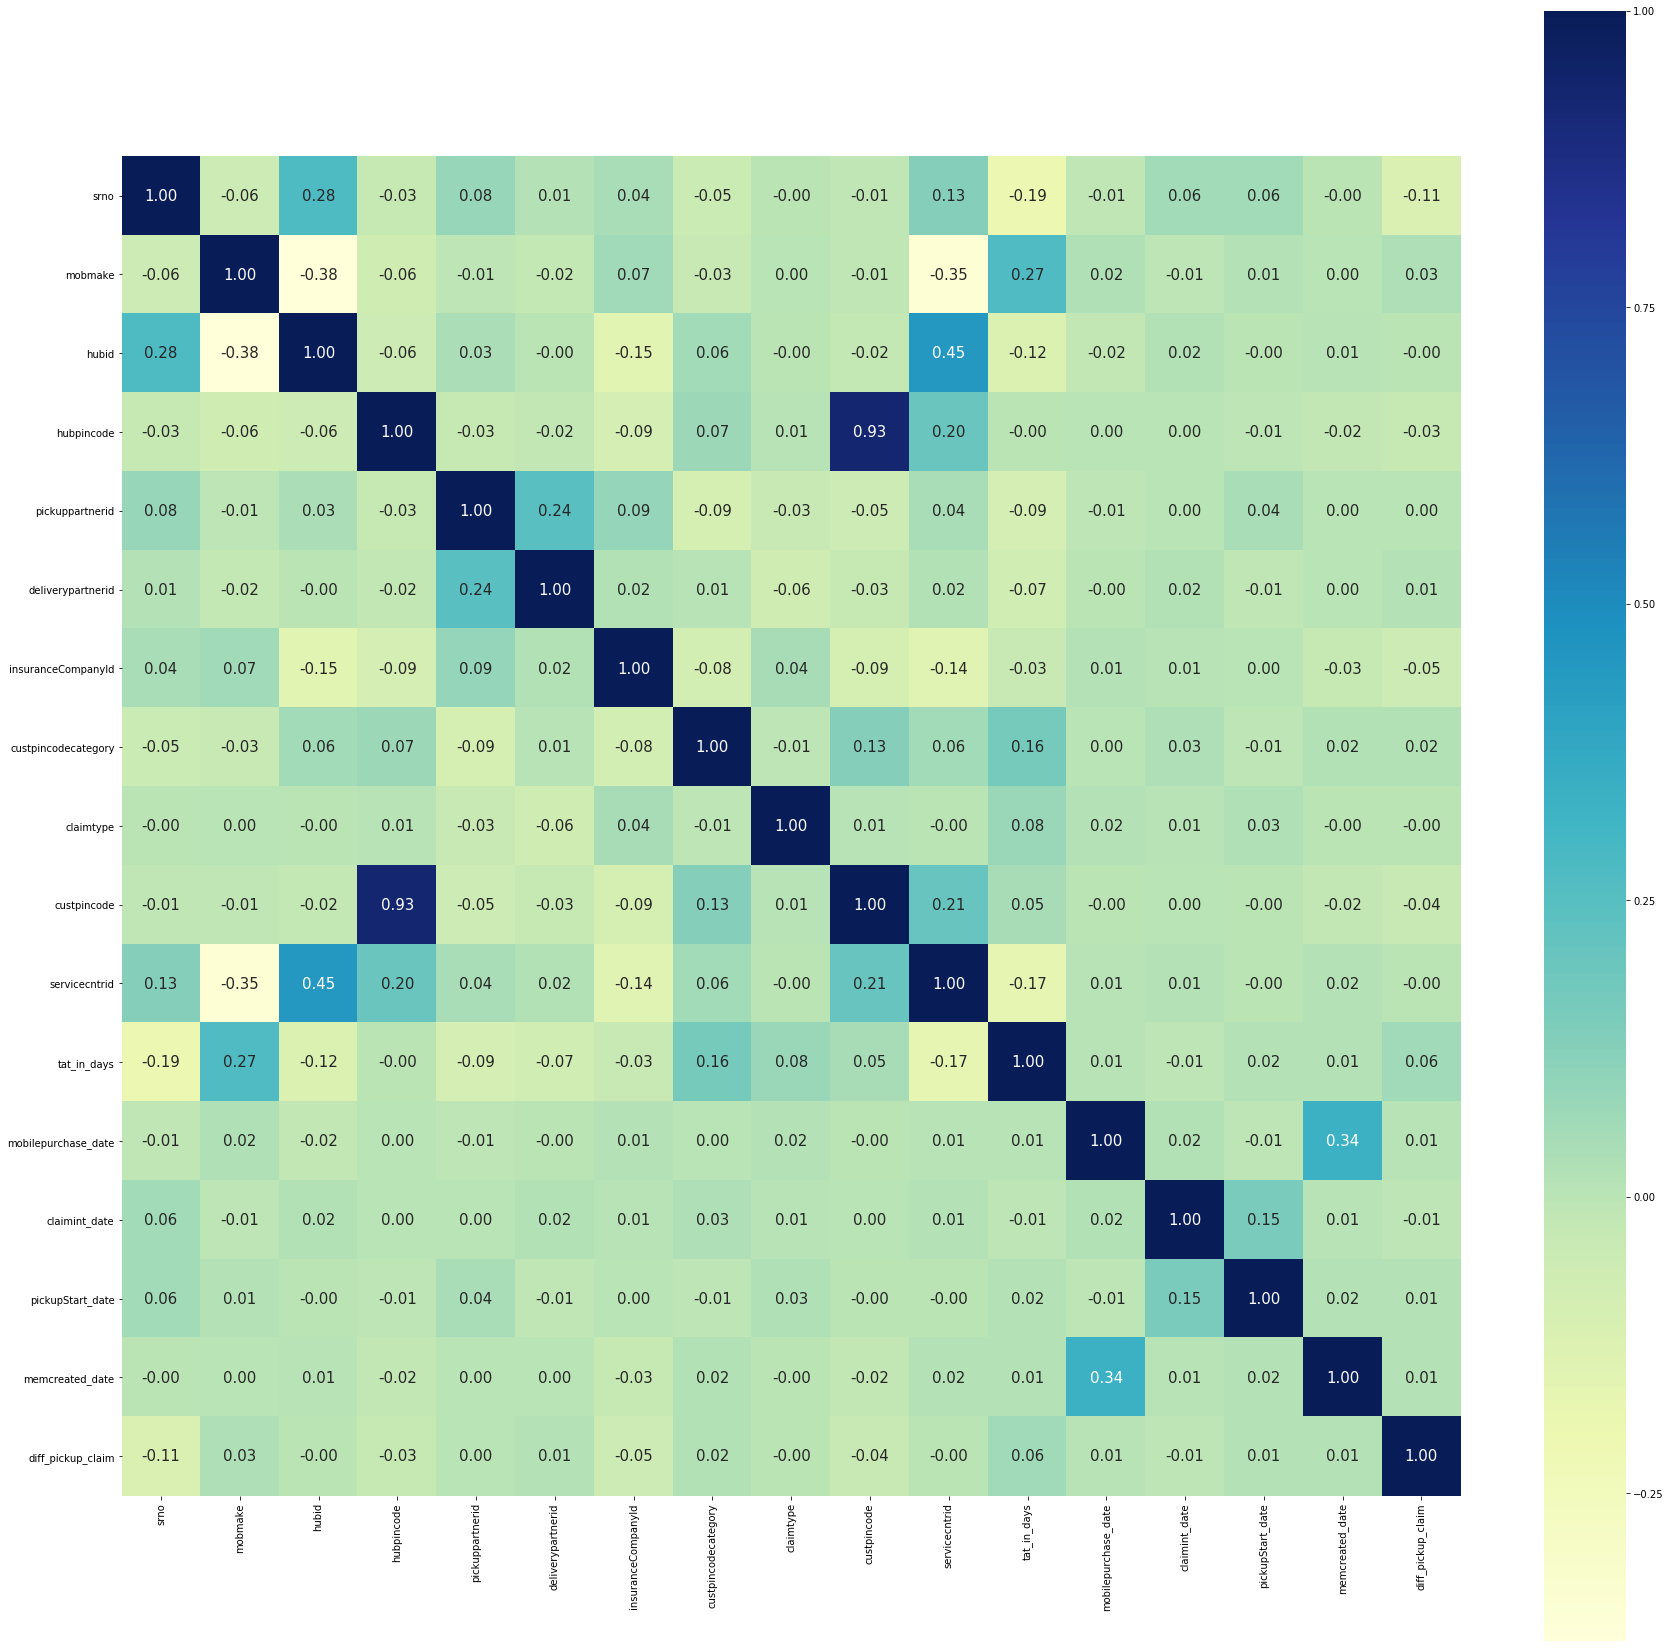

In [22]:
fig,ax=plt.subplots(figsize=(30,30))
correlations=train_data.corr()
sb.heatmap(correlations,square=True,cbar=True,cmap="YlGnBu",annot=True,fmt='.2f',annot_kws={'size':15})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [23]:
#sb.pairplot(train_data)

In [24]:
train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mobilepurchase_date', 'claimint_date', 'pickupStart_date',
       'memcreated_date', 'diff_pickup_claim'],
      dtype='object')

In [25]:
#train_data['mobmake'].value_counts()
train_data['pickuppartnerid'].value_counts()


233    5599
308     306
201     275
0        70
Name: pickuppartnerid, dtype: int64

In [26]:
train_data['deliverypartnerid'].value_counts()

233    5630
245     493
201      71
0        56
Name: deliverypartnerid, dtype: int64

In [27]:
train_data['insuranceCompanyId'].value_counts()

131    4701
228    1549
Name: insuranceCompanyId, dtype: int64

In [28]:
train_data['tat_in_days'].value_counts()

10    672
9     631
11    610
12    604
13    492
8     469
14    462
7     350
16    290
15    287
17    222
18    180
6     169
19    128
20    122
21     96
5      71
23     63
22     60
25     43
24     43
26     31
28     23
27     21
29     18
4      18
32     17
30     13
31     13
33      6
34      4
38      4
37      3
36      2
3       2
35      2
43      1
40      1
44      1
41      1
45      1
39      1
2       1
46      1
57      1
Name: tat_in_days, dtype: int64

<h2> Choosing the featured cols (from independent cols) </h2>

In [29]:
feature_cols=['srno', 'mobmake', 'hubid', 'hubpincode', 'custpincodecategory',
      'claimtype', 'custpincode', 'servicecntrid','mobilepurchase_date','claimint_date', 'memcreated_date','pickupStart_date','diff_pickup_claim']
    
# feature_cols=['pickupStart_date', 'pickupStart_month','claimint_date',
#        'claimint_month','diff_pickup_claim']    
# feature_cols=['mobmake', 'custpincodecategory','pickuppartnerid','deliverypartnerid',
#         'custpincode', 'mobilepurchase_date', 'mobilepurchase_month', 'mobilepurchase_year',
#        'claimint_date', 'claimint_month', 'claimint_year', 'pickupStart_date',
#        'pickupStart_month', 'memcreated_date',
#        'memcreated_month']

# feature_cols=['mobmake', 'custpincodecategory','pickuppartnerid','deliverypartnerid',
#         'custpincode', 'mobilepurchase_date', 'mobilepurchase_month',
#        'claimint_date', 'claimint_month', 'pickupStart_date',
#        'pickupStart_month', 'memcreated_date',
#        'memcreated_month'] 

#feature_cols=['pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype'] 

#feature_cols=['mobilepurchase_date','claimint_date', 'pickupStart_date','memcreated_date',
#        'diff_pickup_claim']


In [30]:
X=train_data[feature_cols]
#X  
X.head(10)         # Independent variables

,srno,mobmake,hubid,hubpincode,custpincodecategory,claimtype,custpincode,servicecntrid,mobilepurchase_date,claimint_date,memcreated_date,pickupStart_date,diff_pickup_claim
0,2851218,0,7,500004,1,1,500001,4403,2,8,27,13,5.0
1,2838330,1,10,226010,1,1,226022,4444,5,4,6,8,4.0
2,2835781,1,2,110018,1,1,110018,4388,27,3,1,12,9.0
3,2838589,2,2,110018,2,1,124001,4092,31,4,17,14,10.0
4,2855214,0,21,110015,1,1,201301,4580,20,9,23,14,5.0
5,2852784,0,21,110015,2,1,132001,4580,17,8,22,15,7.0
6,2844713,3,2,110018,1,1,110059,4094,22,6,26,9,3.0
7,2829719,3,6,160059,2,1,151001,4549,13,1,14,10,9.0
8,2833619,0,3,560011,1,1,560076,4467,22,3,23,8,5.0
9,2870579,1,5,380009,2,1,390006,4422,31,14,1,20,6.0


<h2> Predicting variable </h2>

In [31]:
y=train_data['tat_in_days']   
y.head()

0     5
1    12
2     9
3     9
4     8
Name: tat_in_days, dtype: int64

In [32]:
train_data.groupby('mobmake').describe()

claimint_date                                                        \
                count       mean        std   min    25%   50%    75%   max   
mobmake                                                                       
0              2497.0  14.781738   8.948617   1.0   7.00  14.0  22.00  31.0   
1              1346.0  14.252600   8.863111   1.0   7.00  13.0  21.00  31.0   
2                99.0  14.777778   8.968830   1.0   7.00  14.0  22.00  31.0   
3              1116.0  14.771505   8.977237   1.0   7.00  13.5  23.00  31.0   
4               236.0  14.610169   8.753391   1.0   7.00  13.0  22.00  31.0   
5               158.0  15.120253   8.581834   1.0   8.00  15.0  23.00  31.0   
6                86.0  15.383721   8.515962   1.0   8.00  15.0  23.00  31.0   
7               158.0  16.183544   9.220469   1.0   8.00  15.0  24.00  31.0   
8                74.0  14.432432   8.711638   1.0   7.00  15.0  21.50  31.0   
9                88.0  16.022727   8.726992   1.0   8.75  17.0  22.25  31.0   
10               21.0  17.000000   9.710819   1.0   8.00  16.0  27.00  30.0   
11               20.0  13.700000   8.278698   3.0   7.50  12.5  19.50  31.0   
12               21.0  13.809524   8.681123   1.0   7.00  13.0  19.00  31.0   
13               13.0  20.538462  10.413256   1.0  16.00  26.0  28.00  31.0   
14               46.0  11.913043   9.804367   1.0   5.00   8.5  18.00  31.0   
15               45.0  15.933333   9.038805   1.0   8.00  17.0  23.00  31.0   
16               18.0  12.166667   5.249650   1.0  10.25  12.5  14.75  22.0   
17               26.0  13.461538   8.415371   1.0   5.25  13.0  19.75  28.0   
18               11.0   9.909091   8.360078   1.0   4.00   9.0  13.50  30.0   
19               91.0  12.582418   8.398500   1.0   6.50  10.0  20.00  29.0   
20                3.0  16.333333  11.015141   5.0  11.00  17.0  22.00  27.0   
21                4.0  23.000000  10.954451   7.0  20.50  27.0  29.50  31.0   
22               20.0  16.650000   7.371888   3.0  11.75  18.5  21.25  30.0   
23                3.0  17.333333   7.767453  11.0  13.00  15.0  20.50  26.0   
24               10.0  14.300000   9.649986   2.0   5.75  15.0  18.50  29.0   
25                3.0  12.666667   8.962886   7.0   7.50   8.0  15.50  23.0   
26                8.0  10.250000   5.824824   4.0   6.25   9.0  13.25  20.0   
27                2.0   6.000000   2.828427   4.0   5.00   6.0   7.00   8.0   
28                7.0  13.571429  10.097147   1.0   7.50  13.0  17.50  31.0   
29                1.0   4.000000        NaN   4.0   4.00   4.0   4.00   4.0   
30                2.0  21.000000   9.899495  14.0  17.50  21.0  24.50  28.0   
31                5.0  15.800000   4.816638  10.0  12.00  16.0  20.00  21.0   
32                3.0  19.666667   5.033223  15.0  17.00  19.0  22.00  25.0   
33                1.0   9.000000        NaN   9.0   9.00   9.0   9.00   9.0   
34                2.0   6.000000   7.071068   1.0   3.50   6.0   8.50  11.0   
35                2.0  21.500000  13.435029  12.0  16.75  21.5  26.25  31.0   
36                2.0  10.000000  12.727922   1.0   5.50  10.0  14.50  19.0   
37                2.0  20.500000  14.849242  10.0  15.25  20.5  25.75  31.0   

        claimtype            ...         srno            tat_in_days  \
            count      mean  ...          75%        max       count   
mobmake                      ...                                       
0          2497.0  1.000400  ...   3013022.00  3095741.0      2497.0   
1          1346.0  1.000000  ...   3018927.25  3098427.0      1346.0   
2            99.0  1.000000  ...   3023774.00  3081668.0        99.0   
3          1116.0  1.001792  ...   3017112.00  3091312.0      1116.0   
4           236.0  1.000000  ...   3013130.50  3101035.0       236.0   
5           158.0  1.000000  ...   2996563.25  3086480.0       158.0   
6            86.0  1.011628  ...   2990293.00  3085685.0        86.0   
7           158.0  1.000000  ...   3014721.00  3

In [33]:
X.shape

(6250, 13)

In [34]:
y.shape

(6250,)

<h2>Now Training the data .</h2>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm


<h2> Splitting the data into 3:1( as training data and testing data )</h2>

In [36]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.25) 

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4687, 13)
(4687,)
(1563, 13)
(1563,)


<h2>1.Using Linear Regression Algorithm </h2>

In [38]:
lnreg=LinearRegression(n_jobs=-1)
lnreg.fit(X_train,y_train)


y_pred=lnreg.predict(X_test)

In [39]:
lnreg.intercept_

38.7784879652737

In [40]:
lnreg.coef_

array([-1.16034648e-05,  2.50649048e-01,  2.70260931e-02, -4.89635848e-06,
        9.07916131e-01,  1.55899226e+01,  5.96084772e-06, -2.46013111e-03,
       -3.39433903e-03,  9.13354054e-03,  9.84327137e-03,  1.32555851e-02,
        4.59544509e-02])

In [41]:
list(zip(feature_cols,lnreg.coef_))  

[('srno', -1.1603464750333579e-05),
 ('mobmake', 0.25064904844474295),
 ('hubid', 0.027026093086685788),
 ('hubpincode', -4.896358478816427e-06),
 ('custpincodecategory', 0.9079161310697599),
 ('claimtype', 15.58992261151363),
 ('custpincode', 5.960847720798264e-06),
 ('servicecntrid', -0.0024601311094552564),
 ('mobilepurchase_date', -0.003394339030170242),
 ('claimint_date', 0.009133540544337336),
 ('memcreated_date', 0.009843271368058262),
 ('pickupStart_date', 0.013255585069003154),
 ('diff_pickup_claim', 0.04595445089765869)]

<h2> Calculating Root Mean Square Error(RMSE) </h2>

In [42]:
#y_test

In [43]:
rmse=np.sqrt(((y_test - y_pred) ** 2).mean())
print("RMSE: ",rmse)

RMSE:  4.515471510429308


In [44]:
score=lnreg.score(X_test,y_test)
print('Score: ',score)

Score:  0.17176389342134268


<h2>2. Using Polynomial Regression Model </h2>

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(include_bias=False)
x_poly_train = poly_features.fit_transform(X_train)

# Linear regression
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

# Compare with test data
x_poly_test = poly_features.fit_transform(X_test)
poly_predict = poly_reg.predict(x_poly_test)

#Calculating rmse
poly_mse = mean_squared_error(y_test, poly_predict)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

4.464134211166103

<h2> 3.Using Support Vector Machine </h2>

In [ ]:
# clf = svm.SVR()
# clf.fit(X_train,y_train)

# y_pred=clf.predict(X_test)

In [ ]:
# rmse=np.sqrt(((y_test - y_pred) ** 2).mean())
# rmse

<h2> After comparing the accuracy of diffrent models ,Polynomail Regression has highest accuracy on theses featured cols of this dataset, So, will use this model to predict the values for tat_in_days for test.csv dataset... </h2> 

<h1> Testing data(from test.csv) </h1>

In [69]:
test_data=pd.read_csv('problem_2_test.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [70]:
mob_arr=test_data.mobmake.unique()

In [71]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

34

In [72]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [73]:
test_data['mobmake']=test_data.mobmake.map(mob_dict)

In [74]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [75]:
test_data['claimtype']=test_data.claimtype.map({'ADLD':1,'EW':2})

In [76]:
test_data['mobilepurchase_date']=test_data.mobilepurchasedate.dt.day
#test_data['mobilepurchase_month']=test_data.mobilepurchasedate.dt.month


In [77]:
test_data['claimint_date']=test_data.claimintdate.dt.day
#test_data['claimint_month']=test_data.claimintdate.dt.month


In [78]:
test_data['pickupStart_date']=test_data.pickupStartdate.dt.day
#test_data['pickupStart_month']=test_data.pickupStartdate.dt.month



test_data['memcreated_date']=test_data.memcreateddate.dt.day
#test_data['memcreated_month']=test_data.memcreateddate.dt.month

test_data['diff_pickup_claim']=abs((test_data['pickupStartdate']-test_data['claimintdate']) / np.timedelta64(1, 'D'))
test_data.head(10)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,mobilepurchase_date,claimint_date,pickupStart_date,memcreated_date,diff_pickup_claim
0,2829088,0,3,560011,233,233,131,1,1,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,27,1,6,30,5.0
1,2829866,1,2,110018,233,233,228,1,1,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,25,1,8,17,7.0
2,2894489,1,3,560011,233,233,228,3,1,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,11,21,28,12,7.0
3,2876708,1,2,110018,233,233,228,2,1,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,21,16,26,7,10.0
4,2890283,0,22,400104,233,233,131,3,1,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,22,20,23,10,3.0
5,2897438,2,6,160059,233,233,131,2,1,160036,2017-12-12,2017-12-10,2018-02-22,4549,2018-02-27,10,22,27,12,5.0
6,2849010,2,2,110018,233,233,228,1,1,110065,2017-09-08,2017-05-07,2018-02-07,4091,2018-03-02,7,7,2,8,23.0
7,2887783,3,2,110018,233,233,228,1,1,110092,2018-02-02,2017-09-22,2018-02-19,4095,2018-02-26,22,19,26,2,7.0
8,2941799,0,21,110015,233,233,131,2,1,124001,2017-12-31,2017-06-26,2018-03-05,4580,2018-03-14,26,5,14,31,9.0
9,2973976,0,22,400104,233,233,131,1,1,400011,2017-05-22,2018-03-26,2018-03-13,4581,2018-03-17,26,13,17,22,4.0


In [79]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,mobilepurchase_date,claimint_date,pickupStart_date,memcreated_date,diff_pickup_claim
0,2829088,0,3,560011,233,233,131,1,1,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,27,1,6,30,5.0
1,2829866,1,2,110018,233,233,228,1,1,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,25,1,8,17,7.0
2,2894489,1,3,560011,233,233,228,3,1,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,11,21,28,12,7.0
3,2876708,1,2,110018,233,233,228,2,1,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,21,16,26,7,10.0
4,2890283,0,22,400104,233,233,131,3,1,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,22,20,23,10,3.0


In [80]:

feature_cols=['srno', 'mobmake', 'hubid', 'hubpincode', 'custpincodecategory',
     'claimtype', 'custpincode', 'servicecntrid','mobilepurchase_date','claimint_date', 'memcreated_date','pickupStart_date','diff_pickup_claim']
    

In [81]:
test_X=test_data[feature_cols]
test_X.shape

(2116, 13)

<h2> Making predictions on the test.csv data using linear rergression model </h2>

In [93]:
# Predicting 'tat value on test.csv data'

pred_tat=lnreg.predict(test_X)
pred_tat


array([12.6594812 , 12.58626712, 14.60599288, ..., 12.95303344,
       11.59043384, 11.12366916])

In [94]:
test_data['tat_in_days']=(pred_tat).astype(int)
test_data['tat_in_days'].value_counts()
#test_data['tat_in_days']

12    540
11    433
13    353
10    269
14    188
15    113
16     76
9      68
17     34
18     15
19      8
8       6
20      5
28      2
21      2
23      1
26      1
7       1
6       1
Name: tat_in_days, dtype: int64

In [95]:
test_data.to_csv("problem2_new_test.csv")    #saving the predicted tat value in the new csv file 

In [96]:
new_test=pd.read_csv("problem2_new_test.csv")
new_test.head()

,Unnamed: 0,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,...,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,mobilepurchase_date,claimint_date,pickupStart_date,memcreated_date,diff_pickup_claim,tat_in_days
0,0,2829088,0,3,560011,233,233,131,1,1,...,2017-07-27,2018-02-01,4467,2018-02-06,27,1,6,30,5.0,12
1,1,2829866,1,2,110018,233,233,228,1,1,...,2017-01-25,2018-02-01,4388,2018-02-08,25,1,8,17,7.0,12
2,2,2894489,1,3,560011,233,233,228,3,1,...,2018-01-11,2018-02-21,4460,2018-02-28,11,21,28,12,7.0,14
3,3,2876708,1,2,110018,233,233,228,2,1,...,2017-05-21,2018-02-16,4388,2018-02-26,21,16,26,7,10.0,14
4,4,2890283,0,22,400104,233,233,131,3,1,...,2017-09-22,2018-02-20,4581,2018-02-23,22,20,23,10,3.0,14
